
# TensorFlow Tutorial 使用说明书
到目前为止，你已经学会了使用numpy来建立一个神经网络，接下来会一步步指导你通过深度学习框架更容易的创建一个深度神经网络。机器学习框架例如：Tensorflow,PaddlePaddle,Torch,Caffe,Keras等。并且还能加速你的机器学习过程。所有的这些框架都有相关的文档说明。这节学习如何使用Tensorflow这个框架：
1. 初始化变量
2. 开始你的session
3. 训练算法
4. 实现一个神经网络

框架变成不仅可以减少你的编码时间，有时候还能加快代码的训练优化过程。

## 1 探索Tensorflow库


In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

已经引入了上面相关库，接下里就看看它的不同的应用。使用一个简单的例子来开始，计算你的损失函数关于一个训练样本。
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [2]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()        # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9


写TensorFlow程序已经运行需要有一下步骤：
1. 创建TensorFlow变量Tensor，还没有被执行或者计算的，使用语法，x = tf.constant/Variable(_,_name),一个是创建常量，一个创建变量
2. 根据上面创建的变量写相关的运算法则
3. 初始化你的变量，使用init = tf.global_variables_initializer()
4. 创建一个Session
5. 执行这个session，就开始运行你的运算并且可以打印出结果。

因此当我们为loss函数创建变量时，就简单的定义了loss的函数，但是我们不需要计算它的值，想要计算它的值，我们必须执行init=tf.global_variables_initializer(). 这初始化了loss的相关变量，并且最后执行session.run(loss)时才真正的计算并且可以打印出它的值。再看一下其他简单例子。

In [3]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul:0", shape=(), dtype=int32)


正如我们预料的那样，你没有看见20的结果，仅仅得到了一个Tensor变量，并且没有具体的维度值，是种类型为int32的数。你这里所做的内容只是放进了计算图，但是并没有开始真正的计算。为了计算两个常量的成绩，还需要创建session并且运行session。

In [4]:
sess = tf.Session()
print (sess.run(c))

20


总结：记得要初始化你的变量，创建session并且运行你的运算在session里面。

接下来，你还必须了解 placeholders占位符，一个占位符是一个对象，值可以稍后填入。为了给这个占位符填入数值，必须使用“feed dictionary”（feed_dict variable）。例如，下面例子，我们为x创建了一个占位符，这就允许我们在执行session的时候再填入具体的数值。

In [5]:
# Change the value of x in the feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


当你最开始定义x的时候，不需要具体赋值。在session运行的时候动态赋值，沃恩可以说是在执行session时给这些占位符喂入数据，feed data。

当你在具体化一个计算需要的操作时候，你告诉Tensorflow如何构建一个计算图，这些计算图可以有很多占位符，最后当你执行session时，就告诉Tensorflow执行这个计算图。

## 1.1 线性函数
开始变成使用一个计算线性函数的计算，Y=WX+b，W是一个随机矩阵，b是一个随机向量。

练习矩阵：计算WX+b,W是一个（4,3）的，X是一个（3,1）的矩阵，b是（4,1）的，如何定义一个随机矩阵常量呢：

X = tf.constant(np.random.randn(3,1), name = "X")

你可以使用下面这些辅助函数：
1. tf.matmul(_,_)做矩阵乘法
2. tf.add(_,_)做加法
3. np.random.randn(...)随机初始化

In [6]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    ### START CODE HERE ### (4 lines of code)
    X = tf.constant(np.random.randn(3,1), name='X') #None
    W = tf.constant(np.random.randn(4,3), name='W') #None
    b = tf.constant(np.random.randn(4,1), name='b') #None
    Y = tf.add(tf.matmul(W,X),b) #None
    ### END CODE HERE ### 
    
    # Create the session using tf.Session() and run it with sess.run(...) on the variable you want to calculate
    
    ### START CODE HERE ###
    sess = tf.Session() #None
    result = sess.run(Y) #None
    ### END CODE HERE ### 
    
    # close the session 
    sess.close()

    return result

In [7]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


## 计算sigmoid
Tensorflow提供了很多神经网络里面经常用到的函数，例如 tf.sigmoid 以及tf.softmax，接下里就计算一个输入的sigmoid函数。

使用变量x的占位符，执行session时，喂入存在z里面的数据。你要做的就是：
1. 创建一个x占位符
2. sing一需要计算的操作使用tf.sigmoid
3. 执行session

** Exercise **: Implement the sigmoid function below. You should use the following: 

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`

下面你有两种方式来创建和使用一个session：


**Method 1:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**Method 2:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session for you :)
```


In [8]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """
    
    ### START CODE HERE ### ( approx. 4 lines of code)
    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32, name='x') #None

    # compute sigmoid(x)
    sigmoid = tf.sigmoid(x) #None

    # Create a session, and run it. Please use the method 2 explained above. 
    # You should use a feed_dict to pass z's value to x. 
    with tf.Session() as session: #None
        # Run session and call the output "result"
        result = session.run(sigmoid, feed_dict = {x:z}) #None
    
    ### END CODE HERE ###
    
    return result

In [9]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


<font color='blue'>
**To summarize, you how know how to**:
1. Create placeholders
2. Specify the computation graph corresponding to operations you want to compute
3. Create the session
4. Run the session, using a feed dictionary if necessary to specify placeholder variables' values. 

## 1.3 计算cost
同样你可以使用一个内置函数来计算你的神经网络的代价cost，而不是需要自己写代码来计算y和A[L]的差值关系。
 as a function of $a^{[2](i)}$ and $y^{(i)}$ for i=1...m: 
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

可以使用一行TensorFlow的代码完成这个操作。

**Exercise**: Implement the cross entropy loss. The function you will use is: 


- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

你的代码需要输入z，计算sigmoid函数来得到a值，然后计算交叉熵 代价函数J，所有的这些操作都可以用上面一个调用完成，就完成了关于J的计算。

所以关于tf.nn.sigmoid_cross_entropy_with_logits的两个传入参数，logits是传入的z值，labels是标准标签即y值。

In [10]:
# GRADED FUNCTION: cost

def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    ### START CODE HERE ### 
    
    # Create the placeholders for "logits" (z) and "labels" (y) (approx. 2 lines)
    z = tf.placeholder(tf.float32, name='z') #Noned
    y = tf.placeholder(tf.float32, name='y') #None
    
    # Use the loss function (approx. 1 line)
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y) #None
    
    # Create a session (approx. 1 line). See method 1 above.
    sess = tf.Session() #None
    
    # Run the session (approx. 1 line).
    cost = sess.run(cost, feed_dict = {z:logits,y:labels}) #None
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close()
    
    ### END CODE HERE ###
    
    return cost

In [11]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366408  0.41385433 0.39956617]


## 1.4 使用One Hot Encoding
深度学习中很多时候你都需要将表示样本的标准分类结果（从0到C-1的类标）的向量转化为矩阵。例如：
![One Hot Encoding](https://upload-images.jianshu.io/upload_images/5355764-5c3e3492cefd86c1.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)
这就叫做“One Hot”编码，因为在转换过程中，将一个矩阵的对应的那个类，数置为1，如果你要自己实现要写好几行代码，TensorFlow有直接的一行代码完成这个功能：
•tf.one_hot(labels, depth, axis) 

tf.one_hot()函数的参数分别意思为，indices=labels：表示了每个样本的具体分类的标签值，depth=C：也就是C，矩阵一共有多少行，总共有多少类别，axis=0在哪个方向上操作

In [13]:
# GRADED FUNCTION: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the dept
h of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    ### START CODE HERE ###
    
    # Create a tf.constant equal to C (depth), name it 'C'. (approx. 1 line)
    C = tf.constant(C) #None
    
    # Use tf.one_hot, be careful with the axis (approx. 1 line)
    one_hot_matrix = tf.one_hot(indices=labels,depth=C, axis= 0) #None
    # Create the session (approx. 1 line)
    sess = tf.Session() #None
    
    # Run the session (approx. 1 line)
    one_hot =  sess.run(one_hot_matrix) #None
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close() #None
    
    ### END CODE HERE ###
    
    return one_hot

In [14]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


## 1.5 初始化为0和1
现在你将学习如何初始化一个向量为全是0或者1，可以调用函数tf.ones()。想要初始化为0的数组，可以直接使用tf.zeros()，这些函数可以传入一个维度然后返回一个一位数组内容全是1或者是0.使用•tf.ones(shape)创建一个全是1的数组。

In [17]:
# GRADED FUNCTION: ones

def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    ### START CODE HERE ###
    
    # Create "ones" tensor using tf.ones(...). (approx. 1 line)
    ones = tf.ones(shape) #None
    
    # Create the session (approx. 1 line)
    sess = tf.Session() #None
    
    # Run the session to compute 'ones' (approx. 1 line)
    ones = sess.run(ones) #None
    
    # Close the session (approx. 1 line). See method 1 above.
    sess.close() #None
    
    ### END CODE HERE ###
    return ones

In [38]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


# 使用Tensorflow建立你的第一个神经网络
实现一个TensorFlow模型有两部分：
1. 创建计算图
2. 运行计算图
接下来分解一下你要解决的问题：

## 2.0 问题陈述：SIGNS数据集
决定教会计算机去破解手势语言，我们花了一些时间去拍照在白色的墙前面并且制作出了下面的数据集。现在任务就是建立一个可以促使语言障碍者与一个不懂手语的人之间的交流。

训练集：1080张图片（64\*64像素的）关于手语数字的从0到5（每个数字有180张）

测试集:120张图片（64\*64）关于数字0到5,（每个数字有20张图）

现在已经有了关于SCIGNS数据集，完整的数据集有更多的手势。
![SCIGNS数据集](https://upload-images.jianshu.io/upload_images/5355764-9ab0815eb2e8860a.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)

加载数据集：关于数据是存放在train_signs.h5和test_signs.h5这种.h5后缀形式的文件中，然后调用load_dataset()将数据集整理成对应的X，Y，变成神经网络的输出形式。

In [2]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()
print(X_train_orig.shape)
print(Y_train_orig.shape)
print(X_test_orig.shape)

(1080, 64, 64, 3)
(1, 1080)
(120, 64, 64, 3)


y = 5


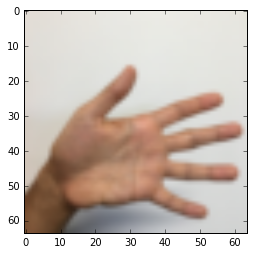

In [40]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [41]:
print(X_train_orig.shape)
print(Y_train_orig.shape)

(1080, 64, 64, 3)
(1, 1080)


关于从h5文件中读出数据，X中存放的是4维数据，第一个维度表示了总共有1080张图片，后面三个数表示了这个图片，像素为64\*64，3代表有3个RGB层。

接下来的任务就是展开数据集，并且通过除以255来标准化。除此之外，对y也要进行处理，因为这里不是二分分类，而是多类分类，所以要通过“One hot”将y类标转化为矩阵。

In [42]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


X_train_orig.reshape(X_train_orig.shape[0], -1).T就是将X_train_orig.shape[0]的四维转化为二维，就是有1080行剩下的三个维度转化为一个维度，所以就是1080行，12288列，但是我们神经网络的输出一般都是一列作为一个样本，所以经过转置得到（12288,1080）。12288=64\*64\*3。

你的目标是建立一个可行的算法来识别手势，并且有高的正确率。为了完成这个目标，你将要建立一个Tensorflow模型，这个模型和前面的使用numpy创建的识别猫图的模型很相似，只不过用的是softmax作为输出层的激活函数，而不再是sigmoid。这也是个好的机会来比较你的numpy实现和TensorFlow框架实现。

这个模型的基本结构就应该是： LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX。

## 2.1 创建占位符
你的第一个任务是给X和Y创建占位符，这将允许你随后在运行session的时候可以动态的添加入数据集的训练数据。

练习：实现下面创建占位符的函数

In [43]:
# GRADED FUNCTION: create_placeholders

def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(tf.float32,shape=[n_x, None]) #None
    Y = tf.placeholder(tf.float32,shape=[n_y, None]) #None
    ### END CODE HERE ###
    
    return X, Y

In [44]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("Placeholder:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Placeholder_1:0", shape=(6, ?), dtype=float32)


关于X和Y占位符，定义方法使用tf.placeholder(tf.float32,shape=[_,_])后面的两个参数，说明维度，多少行多少列，对于数据X和Y，多少行我们是确定的，但是多少列也就是说多少个训练样本，我们是不确定的，所以用None来代替，也让后面添加数据样本更加灵活。运行结果说明，placeholder也是tensor变量。

## 2.2 初始化参数
第二步任务是初始化TensorFlow里的参数

练习：实现下面函数来初始化参数。你将使用 Xavier Initialization 来初始化权重W，以及用0来初始化b。它们的维度下面已经给出了。

```python
W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
```

使用seed=1来保证随机的参数一致。

In [46]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable('W1', [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed=1)) #None
    b1 = tf.get_variable('b1', [25,1], initializer = tf.zeros_initializer()) #None
    W2 = tf.get_variable('W2', [12, 25], initializer = tf.contrib.layers.xavier_initializer(seed=1)) #None
    b2 = tf.get_variable('b2', [12, 1], initializer = tf.zeros_initializer()) #None
    W3 = tf.get_variable('W3', [6, 12], initializer = tf.contrib.layers.xavier_initializer(seed=1)) #None
    b3 = tf.get_variable('b3', [6, 1], initializer = tf.zeros_initializer()) #None
    ### END CODE HERE ###

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [47]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


 xavier 算法通过输入和输出神经元的数目自动确定权值矩阵的初始化大小。，使用 xavier 初始化权值矩阵是为了保证输出和输入尽可能地服从相同的概率分布（注，数据预处理中已对将输入去均值）。
 
  xavier初始化，就是按照对应的维度随机初始化一个权重矩阵后，再×根号（2/上一层单元数）。
  ![Xavier初始化理解](https://upload-images.jianshu.io/upload_images/5355764-8a030e9cd493e290.png?imageMogr2/auto-orient/strip%7CimageView2/2/w/1240)


## 2.3 tensorflow正向传播
接下来你将要实现tensorflow里的正向传播，这个函数将paramters作为输入，并且会计算正向传播过程。你将用到的函数有：

- `tf.add(...,...)` to do an addition
- `tf.matmul(...,...)` to do a matrix multiplication
- `tf.nn.relu(...)` to apply the ReLU activation

问题：实现神经网络的正向传播，注意计算的正向的时候只需要计算到Z3，而不用计算a3,因为在tensorflow框架里面，我们计算代价函数需要的是z3作为输出。

In [48]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.matmul(W1,X) + b1                                           # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                              # A1 = relu(Z1)
    Z2 = tf.matmul(W2,A1) + b2                                              # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                               # A2 = relu(Z2)
    Z3 = tf.matmul(W3,A2) + b3                                             # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

In [49]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("add_2:0", shape=(6, ?), dtype=float32)


tf.reset_default_graph函数用于清除默认图形堆栈并重置全局默认图形。该函数只适用于当前线程。

你可能也注意到前向传播并没有输出任何cache。

## 2.4 计算cost
正如前面看到的那样，计算cost很简单，直接使用：
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```

问题：
1. tf.reduce_mean()是在计算所有样本的总和平均值。
2. 理解“logits”和“lables”参数表示什么很重要，并且cost函数期待的传入的Z3以及Y的维度都应该是（number of examples,num_classes）,与我们最初的维度不同，所以需要先转置。

In [50]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    
    return cost

In [51]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


## 2.5 反向传播以及参数更新
这里才是真正体会到框架好处的地方。所有的反向传播计算梯度以及参数更新都可以使用一行代码完成，在模型中合并这一行是很容易的。

在你计算了代价函数之后，你创建了一个“optimizer”，当执行tf.session的时候，你就调用这一个对象和cost一起。调用的时候，就会在cost函数上执行这个optimizer用你选择的优化方法，以及学习率。

For instance, for gradient descent the optimizer would be:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

To make the optimization you would do:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

上面代码计算反向传播通过相反的顺序通过那个tensorflow计算图，从cost到输入。

当编程时候，我们使用\_变量来存那些我们后面不需要的返回值。比如上面session.run执行完之后使用\_,c来接收返回值，第一个\_表示对这个optimizer的评估值，c表示cost变量的值。

## 2.6 建立模型
现在你可以把上面实现的都整合起来了。


In [52]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = create_placeholders(12288, 6)
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    Z3 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z3, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 1.855702
Cost after epoch 100: 1.016458
Cost after epoch 200: 0.733102
Cost after epoch 300: 0.572939
Cost after epoch 400: 0.468774
Cost after epoch 500: 0.381021
Cost after epoch 600: 0.313827
Cost after epoch 700: 0.254280
Cost after epoch 800: 0.203799
Cost after epoch 900: 0.166512
Cost after epoch 1000: 0.140937
Cost after epoch 1100: 0.107750
Cost after epoch 1200: 0.086299
Cost after epoch 1300: 0.060949
Cost after epoch 1400: 0.050934


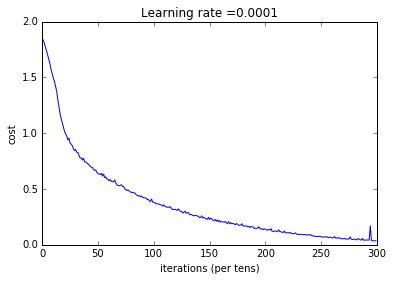

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [53]:
parameters = model(X_train, Y_train, X_test, Y_test)

执行上面代码训练模型大概需要5分钟，在迭代100次之后，cost大概为1.016458，如果不正确的话，不要浪费时间，直接暂停并给检查你的代码哪里有问题，如果正确的话，继续等待。

令人惊奇的是，最后的你的结果是：
**Expected Output**:

<table> 
    <tr> 
        <td>
            **Train Accuracy**
        </td>
        <td>
        0.999074
        </td>
    </tr>
    <tr> 
        <td>
            **Test Accuracy**
        </td>
        <td>
        0.716667
        </td>
    </tr>

</table>


观点：
1. 你的模型看起来足够大而拟合训练集拟合的很好，但是，根据最后的训练集和测试集的差异，你可能需要添加L2正则化或者dropout正则化来减少过拟合。
2. 思考session作为一个代码块来训练模型。每一次你运行session在一个minibatch上，它训练参数parameters，总共你执行了session很多次，1500迭代，知道你获得很好的训练后的参数。


## 2.7 使用你自己的图片来测试
使用下面的步骤你可以用你自己的图片来进行测试：
1. 点击右上角的“File”去你的Coursera hub
2. 加入你的图片在images文件夹里
3. 把你图片的名字写在下面的代码里
4. 执行代码

D:\softpath\Anaconda2\envs\py3\lib\site-packages\scipy\misc\pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
D:\softpath\Anaconda2\envs\py3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Your algorithm predicts: y = 3


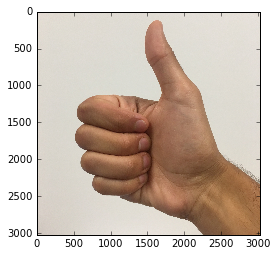

In [54]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "thumbs_up.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

D:\softpath\Anaconda2\envs\py3\lib\site-packages\scipy\misc\pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
D:\softpath\Anaconda2\envs\py3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Your algorithm predicts: y = 1


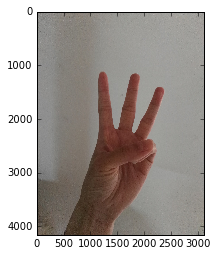

In [55]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "3.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

D:\softpath\Anaconda2\envs\py3\lib\site-packages\scipy\misc\pilutil.py:479: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if issubdtype(ts, int):
D:\softpath\Anaconda2\envs\py3\lib\site-packages\scipy\misc\pilutil.py:482: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif issubdtype(type(size), float):


Your algorithm predicts: y = 1


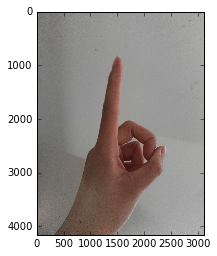

In [68]:
import scipy
from PIL import Image
from scipy import ndimage

## START CODE HERE ## (PUT YOUR IMAGE NAME) 
my_image = "1.jpg"
## END CODE HERE ##

# We preprocess your image to fit your algorithm.
fname = "images/" + my_image
image = np.array(ndimage.imread(fname, flatten=False))
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))

你确实应该得到一个“大拇指”，虽然你可以看到这个算法似乎把它分类错误。原因是训练集不包含任何“大拇指”，所以模型不知道如何处理它！我们称之为“不匹配的数据分发”，它是“构建机器学习项目”的下一门课程之一。

<font color='blue'>
**What you should remember**:
- Tensorflow is a programming framework used in deep learning
- The two main object classes in tensorflow are Tensors and Operators.    tensorflow 里面两个重要的对象就是tensors变量和运算，也就是构成计算图的两种重要东西
- When you code in tensorflow you have to take the following steps:
    - Create a graph containing Tensors (Variables, Placeholders ...) and Operations (tf.matmul, tf.add, ...)
    - Create a session
    - Initialize the session
    - Run the session to execute the graph
- You can execute the graph multiple times as you've seen in model() 你可以计算这个图很多次
- The backpropagation and optimization is automatically done when running the session on the "optimizer" object. 反向传播和优化过程是自动进行的当在optimizer对象上执行session的时候。